In [183]:
import pandas as pd
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

In [343]:
def seir(t, x, a):
    #S, E, I, Q, R, D, V = x
    S = x[0]
    E = x[1]
    I = x[2]
    Q = x[3]
    R = x[4]
    D = x[5]
    V = x[6]
    N = sum(x)
    #Vaccination rate is vaccinated/population/days
    v = 0.00018 # New births and new residents
    b2 = 8.58 * 10**-9 #Transmission rate before intervention
    #b2 = 3.43 * 10**-9 #Transmission rate during and after intervention
    a = a
    u = 3 * 10**-5 #Natural death rate
    gamma = 1/5.5 #Incubation period
    sigma = 0.05 #Vaccine inefficacy
    delta = 1/3.8 #Infection time
    k = 0.014 #Case fatality rate
    lamb = 1/10. #Recovery time
    p = 1/15. #Time until death
    dx = np.zeros(7)
    dx[0] = v * N  - b2 * S * I - a * S - u * S #S
    dx[1] = b2 * S * I - gamma * E + sigma * b2 * V * I - u * E #E
    dx[2] = gamma * E - delta * I - u * I #I
    dx[3] = delta * I - (1-k) * lamb * Q - k * p * Q - u * Q #Q
    dx[4] = (1 - k) * lamb * Q - u * R #R
    dx[5] = k * p * Q #D
    dx[6] = a * S - sigma * b2 * V * I - u * V #V
    return dx

In [848]:
def combinedSeir(x, t, a, days):
    S = x[0]
    E = x[1]
    Ia = x[2]
    Is = x[3]
    R = x[4]
    P = x[5]
    b = 0.00018
    u = 4.563 * 10**-5
    up = 0.1724
    a1 = 0.5
    b1 = 0.00414
    b2 = 0.0115
    delta = 0.7
    W = 0.0051
    w = 0.09
    sigma = 0.0018
    gammas = 0.0714
    gammaa = 0.0714
    ns = 0.1
    na = 0.05
    a = float(a / sum(x) / days)
    z = 1/182.
    dx = np.zeros(6)
    dx[0] = b - ((b1*S*P)/(1+(a1*P))) - ((b2*S*(Ia + Is))/(1+(a1*(Ia + Is)))) + (W*E) - (u*S) - (.95 * a * S) #+ (z * R) #S
    dx[1] = ((b1*S*P)/(1+(a1*P))) + ((b2*S*(Ia + Is))/(1+(a1*(Ia + Is)))) - (W*E) - (u*E) - (w*E) #E
    dx[2] = ((1-delta)*w*E) - ((u + sigma)*Ia) - (gammaa * Ia) #Ia
    dx[3] = (delta * w * E) - ((u + sigma)*Is) - (gammas * Is) #Is
    dx[4] = (gammas * Is) + (gammaa * Ia) - (u * R)# - (z * R) #R
    dx[5] = (na * Ia) + (ns * Is) - (up * P) #P
    return dx

In [849]:
def getSeir(x0, start, end, a, days):
    #x = spi.solve_ivp(combinedSeir, [start, end], x0, args = (a, days),max_step = 0.01, method="RK45")
    t = np.linspace(start, end, end - start)
    x = spi.odeint(combinedSeir, x0, t, args = (a, days))
    return x

In [850]:
x0 = np.array([93000., 1000., 50., 50., 0., 500.])
start1 = 1
end1 = 365
a1 = 0.
days1 = 5
ans1 = getSeir(x0, start1, end1, a1, days1)

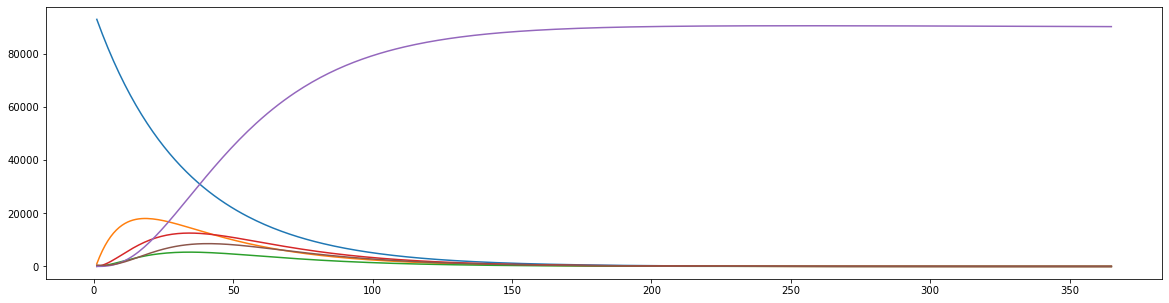

In [851]:
t = np.linspace(start1, end1, end1 - start1)
plt.figure(figsize=(20,5))
plt.plot(t, ans1)

In [840]:
x0 = [93000., 1000., 50., 50., 0., 500.]
start2 = 1
end2 = 365
a2 = 10000.
days2 = 5
ans2 = getSeir(x0, start2, end2, a2, days2)

In [841]:
yy1 = pd.DataFrame(ans2.y).T
plt.plot(yy1)

AttributeError: 'numpy.ndarray' object has no attribute 'y'

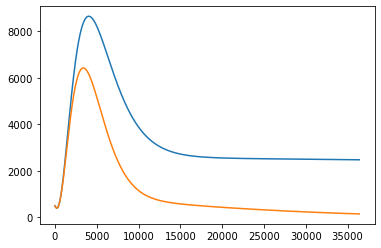

In [562]:
plt.plot(yy[5])
plt.plot(yy1[5])

In [563]:
clustered = pd.read_csv('../clean-data/new-clusters.csv')

In [564]:
clustered.head()

,Unnamed: 0,FIPS,Countyname,ST_Name,Black,Med_HH_Inc,ICU_Capacity,State_Test,Hisp,Population_Density,...,Asian,Poverty,Deaths,Confirmed,Over_65,Population,KMeans_Cluster,Hierarchical_cluster,DBSCAN_cluster,MeanShift_cluster
0,0,1001,Autauga,Alabama,0.219543,116.216163,0.000125,0,0.032648,0.000022,...,0.011953,0.140249,103,6702,0.172793,47936.0,1,0,0,0
1,1,1003,Baldwin,Alabama,0.117957,115.402881,0.000193,0,0.058668,0.000029,...,0.011811,0.135085,300,20588,0.256945,165526.0,1,0,0,0
2,2,1005,Barbour,Alabama,0.417034,64.360060,0.000173,0,0.038303,0.000009,...,0.004194,0.204825,55,2244,0.163264,28849.0,2,2,1,2
3,3,1007,Bibb,Alabama,0.235553,94.075511,0.000000,0,0.027381,0.000009,...,0.001277,0.193937,58,2560,0.169488,21146.0,2,2,1,2
4,4,1009,Blount,Alabama,0.016272,97.668988,0.000111,0,0.098665,0.000022,...,0.003916,0.172211,134,6472,0.190717,54143.0,1,0,0,0


In [565]:
clustered[clustered["Countyname"] == "Alachua"]

,Unnamed: 0,FIPS,Countyname,ST_Name,Black,Med_HH_Inc,ICU_Capacity,State_Test,Hisp,Population_Density,...,Asian,Poverty,Deaths,Confirmed,Over_65,Population,KMeans_Cluster,Hierarchical_cluster,DBSCAN_cluster,MeanShift_cluster
239,319,12001,Alachua,Florida,0.249281,89.272368,0.001397,21335952,0.124262,0.000063,...,0.076138,0.222158,259,23734,0.17195,211183.0,0,1,5,1


In [568]:
clustered[clustered["Hierarchical_cluster"] == 0].iloc[len(clustered) //2]

Unnamed: 0                     2096
FIPS                          39107
Countyname                   Mercer
ST_Name                        Ohio
Black                     0.0082966
Med_HH_Inc                  111.219
ICU_Capacity             0.00012383
State_Test                 11230029
Hisp                      0.0195156
Population_Density      1.90023e-05
AVG_VENTILATOR_USAGE              2
Asian                    0.00564664
Poverty                   0.0671158
Deaths                           84
Confirmed                      4666
Over_65                    0.175194
Population                    40378
KMeans_Cluster                    1
Hierarchical_cluster              0
DBSCAN_cluster                    0
MeanShift_cluster                 0
Name: 1610, dtype: object

In [ ]:
#Mercer county Ohio

In [576]:
texas = clustered[clustered["ST_Name"] == "Texas"]
clustered[clustered["Hierarchical_cluster"] == 2]

,Unnamed: 0,FIPS,Countyname,ST_Name,Black,Med_HH_Inc,ICU_Capacity,State_Test,Hisp,Population_Density,...,Asian,Poverty,Deaths,Confirmed,Over_65,Population,KMeans_Cluster,Hierarchical_cluster,DBSCAN_cluster,MeanShift_cluster
2,2,1005,Barbour,Alabama,0.417034,64.360060,0.000173,0,0.038303,0.000009,...,0.004194,0.204825,55,2244,0.163264,28849.0,2,2,1,2
3,3,1007,Bibb,Alabama,0.235553,94.075511,0.000000,0,0.027381,0.000009,...,0.001277,0.193937,58,2560,0.169488,21146.0,2,2,1,2
5,5,1011,Bullock,Alabama,0.715780,74.768482,0.000000,0,0.024463,0.000005,...,0.004669,0.236881,40,1213,0.153128,10710.0,2,2,1,2
6,6,1013,Butler,Alabama,0.447856,80.512902,0.000308,0,0.013895,0.000007,...,0.003461,0.206872,66,2119,0.195636,19935.0,2,2,1,2
7,7,1015,Calhoun,Alabama,0.216478,93.507599,0.000248,0,0.039782,0.000048,...,0.009205,0.173570,310,14263,0.180425,109397.0,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2937,51710,Norfolk,Virginia,0.455533,69.507693,0.000736,0,0.090438,0.000912,...,0.039210,0.181837,239,16530,0.122150,217519.0,2,2,1,2
2196,2939,51730,Petersburg,Virginia,0.757823,52.112581,0.000914,0,0.048651,0.000336,...,0.008900,0.210408,79,3587,0.166002,31572.0,2,2,1,2
2197,2941,51740,Portsmouth,Virginia,0.513112,70.295869,0.000360,0,0.043815,0.000652,...,0.013479,0.174143,177,8499,0.142268,96817.0,2,2,1,2
2198,2943,51760,Richmond City,Virginia,0.565262,63.660370,0.000707,0,0.083865,0.000724,...,0.025340,0.224965,255,16096,0.155751,186740.0,2,2,1,2


In [577]:
#Suffolk Virginia

In [578]:
clustered.columns

Index(['Unnamed: 0', 'FIPS', 'Countyname', 'ST_Name', 'Black', 'Med_HH_Inc',
       'ICU_Capacity', 'State_Test', 'Hisp', 'Population_Density',
       'AVG_VENTILATOR_USAGE', 'Asian', 'Poverty', 'Deaths', 'Confirmed',
       'Over_65', 'Population', 'KMeans_Cluster', 'Hierarchical_cluster',
       'DBSCAN_cluster', 'MeanShift_cluster'],
      dtype='object')

In [580]:
clustered["Exposed"] = 3 * clustered["Confirmed"]

In [581]:
clustered["Ia"] = clustered["Exposed"] / 2
clustered["Is"] = clustered["Exposed"] / 2

In [582]:
clustered["Recovered"] = 0
clustered["Susceptible"] = clustered["Population"] - clustered["Exposed"] - clustered["Ia"] - clustered["Is"] - clustered["Recovered"]
clustered["Pathogen"] = 0.005 * clustered["Susceptible"]

In [596]:
for_model = clustered[["Countyname", "ST_Name", "Susceptible", "Exposed", "Ia", "Is", "Recovered", "Pathogen"]]

In [597]:
alachua = for_model[for_model["Countyname"] == "Alachua"]

In [598]:
suffolk = for_model[for_model["Countyname"] == "Suffolk"]

In [661]:
mercer = for_model[for_model["Countyname"] == "Mercer"]

In [662]:
mercer = mercer[mercer["ST_Name"] == "Ohio"]

In [603]:
suffolk = suffolk[suffolk["ST_Name"] == "Virginia"]

In [604]:
alachua

,Countyname,ST_Name,Susceptible,Exposed,Ia,Is,Recovered,Pathogen
239,Alachua,Florida,68779.0,71202,35601.0,35601.0,0,343.895


In [605]:
initial_predictions = pd.concat([alachua, mercer, suffolk], ignore_index=True)

In [606]:
initial_predictions

,Countyname,ST_Name,Susceptible,Exposed,Ia,Is,Recovered,Pathogen
0,Alachua,Florida,68779.0,71202,35601.0,35601.0,0,343.895
1,Mercer,Ohio,12382.0,13998,6999.0,6999.0,0,61.910
2,Suffolk,Virginia,32053.0,22572,11286.0,11286.0,0,160.265


In [615]:
x0 = [alachua["Susceptible"].values[0], alachua["Exposed"].values[0], alachua["Ia"].values[0], alachua["Is"].values[0], alachua["Recovered"].values[0],
     alachua["Pathogen"].values[0]]
x0

[68779.0, 71202, 35601.0, 35601.0, 0, 343.895]

In [800]:
alachua_model = getSeir(x0, 1, 30, 0, 30)

In [801]:
S = alachua_model[:,0]; E = alachua_model[:,1]; Ia = alachua_model[:, 2]; Is = alachua_model[:, 3]; R = alachua_model[:, 4]; P = alachua_model[:, 5];

In [802]:
alachua = pd.DataFrame(data=[S, E, Ia, Is, R, P]).T

In [803]:
alachua.columns = ["S", "E", "Ia", "Is", "R", "P"]

In [804]:
alachua.columns = ["S", "E", "Ia", "Is", "R", "P"]

In [805]:
alachua

,S,E,Ia,Is,R,P
0,68779.000000,71202.000000,35601.000000,35601.000000,0.000000,343.895000
1,66956.734386,66612.748251,34854.154506,37326.157207,5289.498031,5422.558557
2,65199.038356,62399.388098,34043.488984,38649.059540,10603.238139,9777.255874
3,63506.152316,58528.269716,33183.319273,39621.618597,15909.208253,13488.132554
4,61877.616587,54969.237554,32286.060413,40289.958615,21180.174060,16627.495738
5,60312.674630,51694.967651,31362.448017,40695.031972,26393.115174,19260.494317
6,58810.334529,48680.679193,30421.732571,40873.163872,31528.725135,21445.749540
7,57369.412523,45903.884954,29471.853456,40856.543464,36570.963109,23235.943126
8,55988.568539,43344.170328,28519.592931,40673.661634,41506.657103,24678.358575
9,54666.337135,40982.993465,27570.714091,40349.705970,46325.148542,25815.381994


In [636]:
alachua.to_csv("../clean-data/alachua.csv")

In [640]:
def getDF(row, export_name, county_name):
    x0 = [row["Susceptible"].values[0], row["Exposed"].values[0], row["Ia"].values[0], row["Is"].values[0], row["Recovered"].values[0],
     row["Pathogen"].values[0]]
    test = getSeir(x0, 1, 30, 0, 30)
    S = test[:,0]; E = test[:,1]; Ia = test[:, 2]; Is = test[:, 3]; R = test[:, 4]; P = test[:, 5];
    to_export = pd.DataFrame(data=[S, E, Ia, Is, R, P]).T
    to_export.columns = ["S", "E", "Ia", "Is", "R", "P"]
    to_export["County"] = county_name
    to_export.to_csv("../clean-data/{}".format(export_name))
    return to_export
    

In [807]:
suffolk = getDF(suffolk, "suffolk.csv", "Suffolk")

In [808]:
mercer = getDF(mercer, "mercer.csv", "Mercer")

In [644]:
total = pd.concat([alachua, suffolk, mercer])

In [645]:
test = total.sort_index()

In [646]:
test

,S,E,Ia,Is,R,P,County
0,68779.000000,71202.000000,35601.000000,35601.000000,0.000000,343.895000,Alachua
0,12382.000000,13998.000000,6999.000000,6999.000000,0.000000,61.910000,Mercer
0,32053.000000,22572.000000,11286.000000,11286.000000,0.000000,160.265000,Suffolk
1,66956.734386,66612.748251,34854.154506,37326.157207,5289.498031,5422.558557,Alachua
1,12060.513697,13060.741689,6851.682859,7337.013578,1039.850936,1061.237830,Mercer
...,...,...,...,...,...,...,...
27,38966.527048,18844.498782,13957.044820,26445.018054,109693.949323,22726.264590,Alachua
27,16866.087640,7760.689268,4996.178180,9717.175936,36752.875924,8012.993196,Suffolk
28,16575.755393,7548.076405,4837.249740,9488.112380,37613.151078,7846.193847,Suffolk
28,38439.825549,18269.854051,13436.962779,25678.696452,111997.760727,22129.869742,Alachua


In [647]:
total = test[["County", "S", "E", "Ia", "Is", "R", "P"]]

In [787]:
total["Entry"] = total.index

<ipython-input-787-d45a73cbeecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total["Entry"] = total.index


In [790]:
total = total.sort_values(["Entry", "County"])
total.drop("Entry", axis=1, inplace=True)

In [791]:
total.to_csv("../clean-data/combined-seir.csv")

In [792]:
buckets = [[158, 51, 18], [29, 187, 25], [88, 67, 141], [103, 87, 130], [119, 104, 154], [26, 124, 6], [12, 126, 155], [162, 191, 23], [11, 165, 171], [145, 60, 76]]
distributions = [[0.6960352422907489, 0.22466960352422907, 0.07929515418502203], [0.12033195020746888, 0.7759336099585062, 0.1037344398340249], [0.2972972972972973, 0.22635135135135134, 0.47635135135135137], [0.321875, 0.271875, 0.40625], [0.3156498673740053, 0.27586206896551724, 0.40848806366047746], [0.16666666666666666, 0.7948717948717948, 0.038461538461538464], [0.040955631399317405, 0.4300341296928328, 0.5290102389078498], [0.4308510638297872, 0.5079787234042553, 0.061170212765957445], [0.03170028818443804, 0.4755043227665706, 0.49279538904899134], [0.5160142348754448, 0.21352313167259787, 0.2704626334519573]]

In [793]:
#Mercer 21% Vaccinated
#Alachua 27% Vaccinated
clustered

,Unnamed: 0,FIPS,Countyname,ST_Name,Black,Med_HH_Inc,ICU_Capacity,State_Test,Hisp,Population_Density,...,KMeans_Cluster,Hierarchical_cluster,DBSCAN_cluster,MeanShift_cluster,Exposed,Ia,Is,Recovered,Susceptible,Pathogen
0,0,1001,Autauga,Alabama,0.219543,116.216163,0.000125,0,0.032648,2.169656e-05,...,1,0,0,0,20106,10053.0,10053.0,0,7724.0,38.620
1,1,1003,Baldwin,Alabama,0.117957,115.402881,0.000193,0,0.058668,2.868502e-05,...,1,0,0,0,61764,30882.0,30882.0,0,41998.0,209.990
2,2,1005,Barbour,Alabama,0.417034,64.360060,0.000173,0,0.038303,8.853070e-06,...,2,2,1,2,6732,3366.0,3366.0,0,15385.0,76.925
3,3,1007,Bibb,Alabama,0.235553,94.075511,0.000000,0,0.027381,9.151278e-06,...,2,2,1,2,7680,3840.0,3840.0,0,5786.0,28.930
4,4,1009,Blount,Alabama,0.016272,97.668988,0.000111,0,0.098665,2.204467e-05,...,1,0,0,0,19416,9708.0,9708.0,0,15311.0,76.555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356,3136,56037,Sweetwater,Wyoming,0.013145,116.852722,0.000242,696725,0.186219,7.619300e-07,...,1,0,0,0,12237,6118.5,6118.5,0,12649.0,63.245
2357,3137,56039,Teton,Wyoming,0.015963,132.208153,0.000331,696725,0.193217,8.593060e-07,...,1,0,0,0,10959,5479.5,5479.5,0,-3814.0,-19.070
2358,3138,56041,Uinta,Wyoming,0.001183,98.991397,0.000154,696725,0.096164,2.028246e-06,...,1,0,0,0,6420,3210.0,3210.0,0,6606.0,33.030
2359,3139,56043,Washakie,Wyoming,0.000401,84.557136,0.000401,696725,0.152674,6.682561e-07,...,1,0,0,0,2679,1339.5,1339.5,0,2122.0,10.610


In [794]:
clustered["Population"]

0        47936.0
1       165526.0
2        28849.0
3        21146.0
4        54143.0
          ...   
2356     37123.0
2357     18104.0
2358     19446.0
2359      7480.0
2360      6667.0
Name: Population, Length: 2361, dtype: float64

In [795]:
vaccine_days = 127.
alachua_vaccines = 0.27 * clustered[clustered["Countyname"] == "Alachua"]["Population"].values[0]

In [796]:
mercer = clustered[clustered["Countyname"] == "Mercer"]
mercer = mercer[mercer["ST_Name"] == "Ohio"]
mercer_vaccines = 0.21 * mercer["Population"].values[0]

In [797]:
suffolk = clustered[clustered["Countyname"] == "Suffolk"]
suffolk = suffolk[suffolk["ST_Name"] == "Virginia"]
suffolk_vaccines = 0.25 * suffolk["Population"].values[0]

In [798]:
print(alachua_vaccines, mercer_vaccines, suffolk_vaccines)

57019.41 8479.38 19299.25


In [809]:
xA = [alachua["S"].values[0], alachua["E"].values[0], alachua["Ia"].values[0], alachua["Is"].values[0],
     alachua["R"].values[0], alachua["P"].values[0]]
xM = [mercer["S"].values[0], mercer["E"].values[0], mercer["Ia"].values[0], mercer["Is"].values[0],
     mercer["R"].values[0], mercer["P"].values[0]]
xS = [suffolk["S"].values[0], suffolk["E"].values[0], suffolk["Ia"].values[0], suffolk["Is"].values[0],
     suffolk["R"].values[0], suffolk["P"].values[0]]

In [684]:
vaccines_per_day = sum([alachua_vaccines, mercer_vaccines, suffolk_vaccines]) / vaccine_days

In [810]:
model_total_vaccines = vaccines_per_day * 29

In [811]:
alachua_real = getSeir(xA, 1, 30, 57019, 127)

In [812]:
alachua_raw_count = 0
mercer_raw_count = 0
suffolk_raw_count = 0
for i in buckets:
    for j in range(len(i)):
        if j == 0:
            alachua_raw_count += i[j]
        elif j == 1:
            mercer_raw_count += i[j]
        else:
            suffolk_raw_count += i[j]
            

In [813]:
alachua_percentage = alachua_raw_count / sum([alachua_raw_count, mercer_raw_count, suffolk_raw_count])
mercer_percentage = mercer_raw_count / sum([alachua_raw_count, mercer_raw_count, suffolk_raw_count])
suffolk_percentage = suffolk_raw_count / sum([alachua_raw_count, mercer_raw_count, suffolk_raw_count])

In [853]:
alachua_m = alachua_percentage * model_total_vaccines
mercer_m = mercer_percentage * model_total_vaccines
suffolk_m = suffolk_percentage * model_total_vaccines
print( "Alachua County Vaccines: {}".format(alachua_m))
print("Mercer County Vaccines: {}".format(mercer_m))
print("Suffolk County Vaccines: {}".format(suffolk_m))

Alachua County Vaccines: 5668.127031274488
Mercer County Vaccines: 7721.411032052703
Suffolk County Vaccines: 5973.793905176747


In [815]:
alachua_model = getSeir(xA, 1, 30, alachua_m, 29)

In [816]:
SaM = alachua_model[:,0]; EaM = alachua_model[:,1]; IaaM = alachua_model[:, 2]; IsaM = alachua_model[:, 3]; RaM = alachua_model[:, 4]; PaM = alachua_model[:, 5];
SaR = alachua_real[:,0]; EaR = alachua_real[:,1]; IaaR = alachua_real[:, 2]; IsaR = alachua_real[:, 3]; RaR = alachua_real[:, 4]; PaR = alachua_real[:, 5];

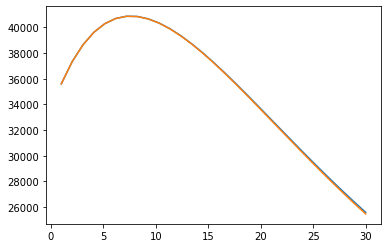

In [817]:
t = np.linspace(1, 30, 29)
plt.plot(t, IsaM)
plt.plot(t, IsaR)

In [818]:
mercer_model = getSeir(xM, 1, 30, mercer_m, 29)
mercer_real = getSeir(xM, 1, 30, 8479, 127)
SmM = mercer_model[:,0]; EmM = mercer_model[:,1]; IamM = mercer_model[:, 2]; IsmM = mercer_model[:, 3]; RmM = alachua_model[:, 4]; PmM = mercer_model[:, 5];
SmR = mercer_real[:,0]; EmR = mercer_real[:,1]; IamR = mercer_real[:, 2]; IsmR = mercer_real[:, 3]; RmR = mercer_real[:, 4]; PmR = mercer_real[:, 5];

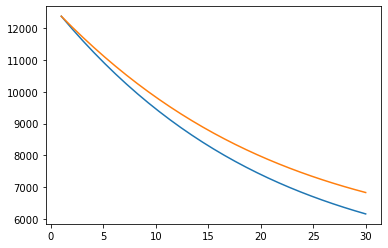

In [819]:
t = np.linspace(1, 30, 29)
plt.plot(t, SmM)
plt.plot(t, SmR)

In [820]:
suffolk_model = getSeir(xS, 1, 30, suffolk_m, 29)
suffolk_real = getSeir(xS, 1, 30, 19299, 127)
SsM = suffolk_model[:,0]; EsM = suffolk_model[:,1]; IasM = suffolk_model[:, 2]; IssM = suffolk_model[:, 3]; RsM = suffolk_model[:, 4]; PsM = suffolk_model[:, 5];
SsR = suffolk_real[:,0]; EsR = suffolk_real[:,1]; IasR = suffolk_real[:, 2]; IssR = suffolk_real[:, 3]; RsR = suffolk_real[:, 4]; PsR = suffolk_real[:, 5];

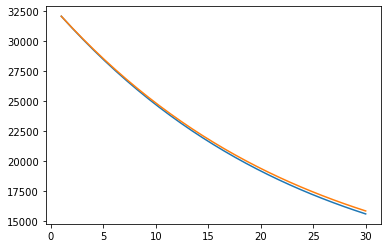

In [821]:
plt.plot(t, SsM)
plt.plot(t, SsR)

In [822]:
suffolk_diff = SsR[-1] - SsM[-1]

In [823]:
mercer_diff = SmR[-1] - SmM[-1]

In [824]:
alachua_diff = SaR[-1] - SaM[-1]

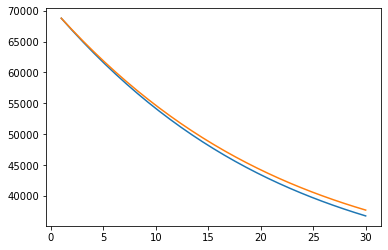

In [825]:
plt.plot(t, SaR)
plt.plot(t, SaM)

In [826]:
suffolk_diff + mercer_diff + alachua_diff

-24.375780288021815

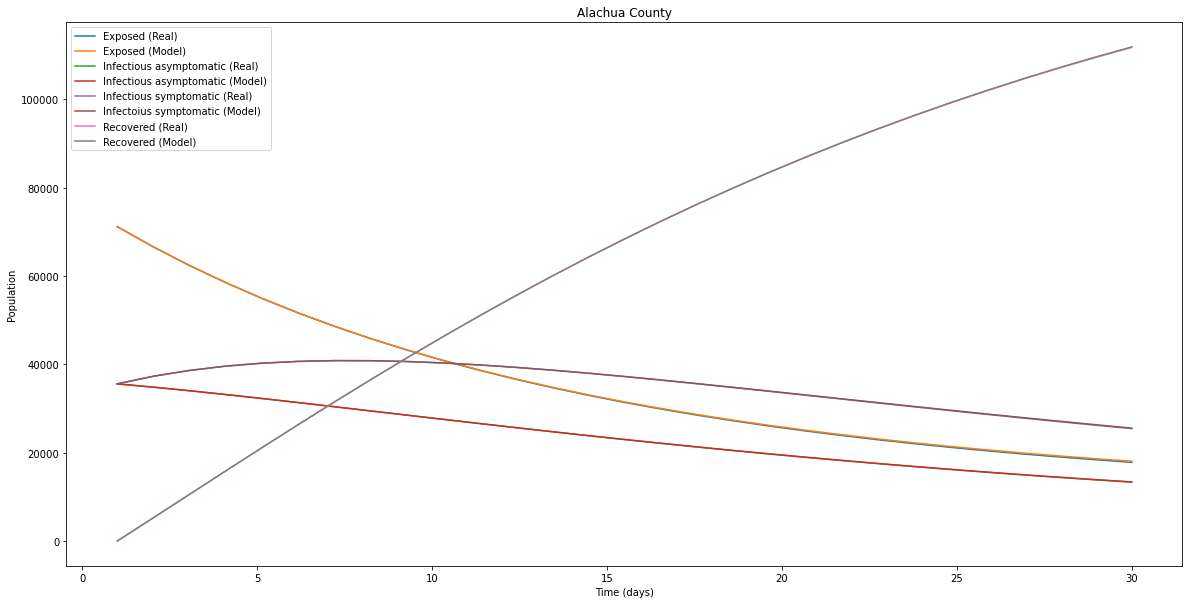

In [827]:
plt.figure(figsize=(20,10))
plt.plot(t, EaR, label = "Exposed (Real)")
plt.plot(t, EaM, label = "Exposed (Model)")
plt.plot(t, IaaR, label = "Infectious asymptomatic (Real)")
plt.plot(t, IaaM, label = "Infectious asymptomatic (Model)")
plt.plot(t, IsaR, label = "Infectious symptomatic (Real)")
plt.plot(t, IsaM, label = "Infectoius symptomatic (Model)")
plt.plot(t, RaR, label = "Recovered (Real)")
plt.plot(t, RaM, label = "Recovered (Model)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.title("Alachua County")
plt.legend()

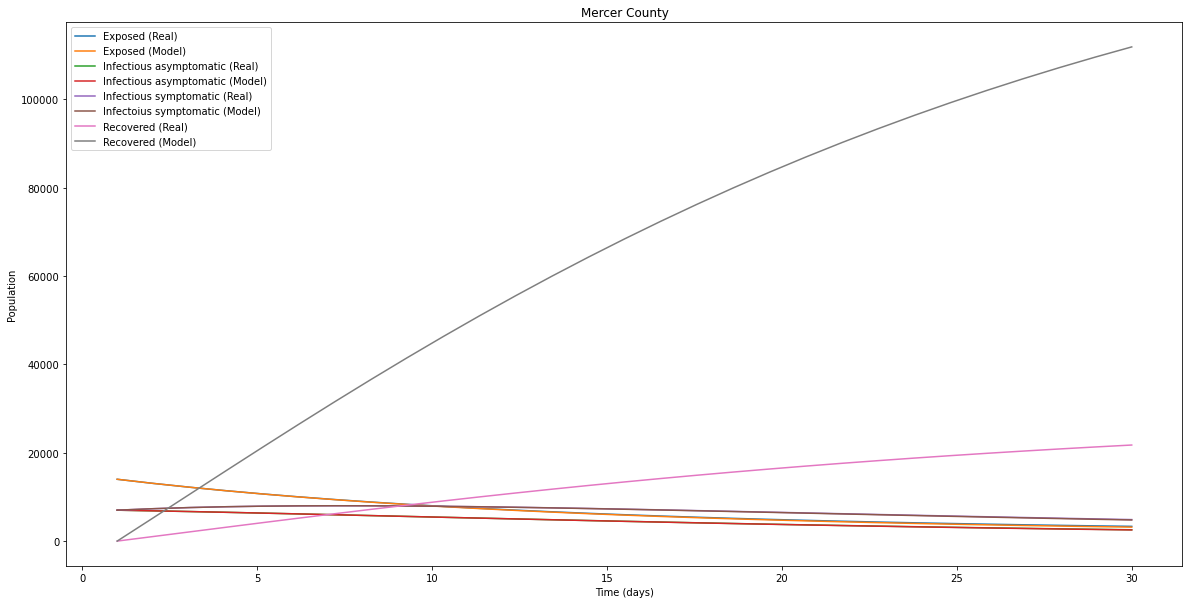

In [828]:
plt.figure(figsize=(20,10))
plt.plot(t, EmR, label = "Exposed (Real)")
plt.plot(t, EmM, label = "Exposed (Model)")
plt.plot(t, IamR, label = "Infectious asymptomatic (Real)")
plt.plot(t, IamM, label = "Infectious asymptomatic (Model)")
plt.plot(t, IsmR, label = "Infectious symptomatic (Real)")
plt.plot(t, IsmM, label = "Infectoius symptomatic (Model)")
plt.plot(t, RmR, label = "Recovered (Real)")
plt.plot(t, RmM, label = "Recovered (Model)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.title("Mercer County")
plt.legend()

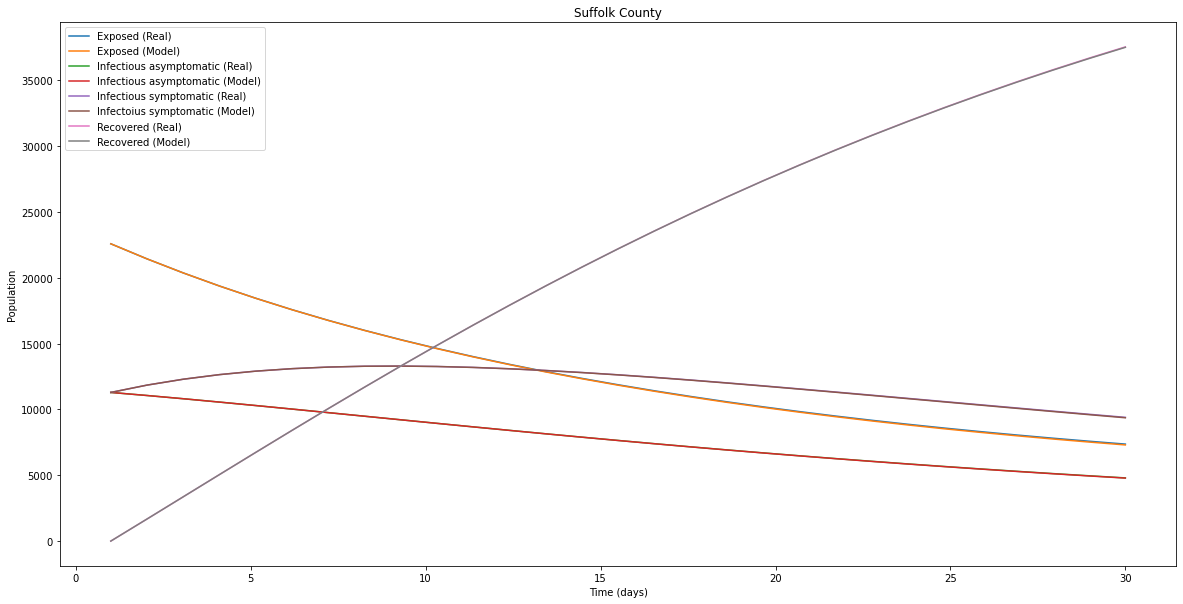

In [829]:
plt.figure(figsize=(20,10))
plt.plot(t, EsR, label = "Exposed (Real)")
plt.plot(t, EsM, label = "Exposed (Model)")
plt.plot(t, IasR, label = "Infectious asymptomatic (Real)")
plt.plot(t, IasM, label = "Infectious asymptomatic (Model)")
plt.plot(t, IssR, label = "Infectious symptomatic (Real)")
plt.plot(t, IssM, label = "Infectoius symptomatic (Model)")
plt.plot(t, RsR, label = "Recovered (Real)")
plt.plot(t, RsM, label = "Recovered (Model)")
plt.xlabel("Time (days)")
plt.ylabel("Population")
plt.title("Suffolk County")
plt.legend()

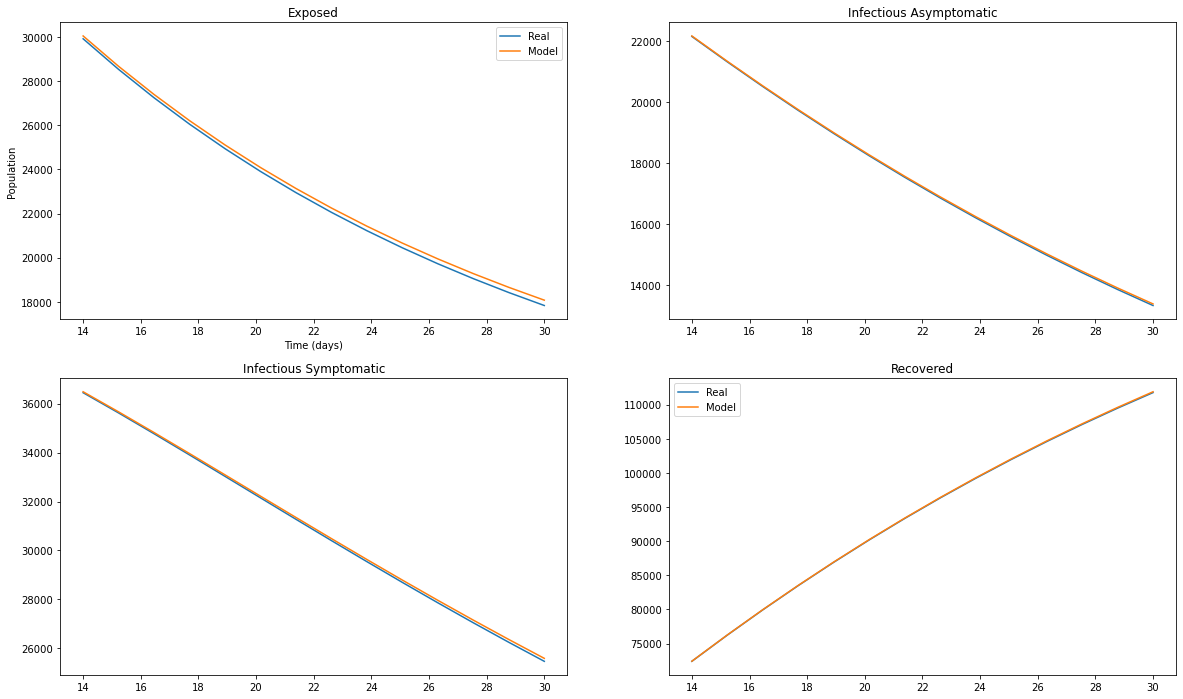

In [830]:
t = np.linspace(14, 30, 14)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.plot(t, EaR[15:], label = "Real")
ax1.plot(t, EaM[15:], label = "Model")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Population")
ax1.title.set_text("Exposed")
ax1.legend()
ax2.plot(t, IaaR[15:], label = "Real")
ax2.plot(t, IaaM[15:], label = "Model")
ax2.title.set_text("Infectious Asymptomatic")
ax3.plot(t, IsaR[15:], label = "Real")
ax3.plot(t, IsaM[15:], label = "Model")
ax3.title.set_text("Infectious Symptomatic")
ax4.plot(t, RaR[15:], label = "Real")
ax4.plot(t, RaM[15:], label = "Model")
ax4.title.set_text("Recovered")
plt.legend()
fig.savefig("../visualizations/alachua-model.png")

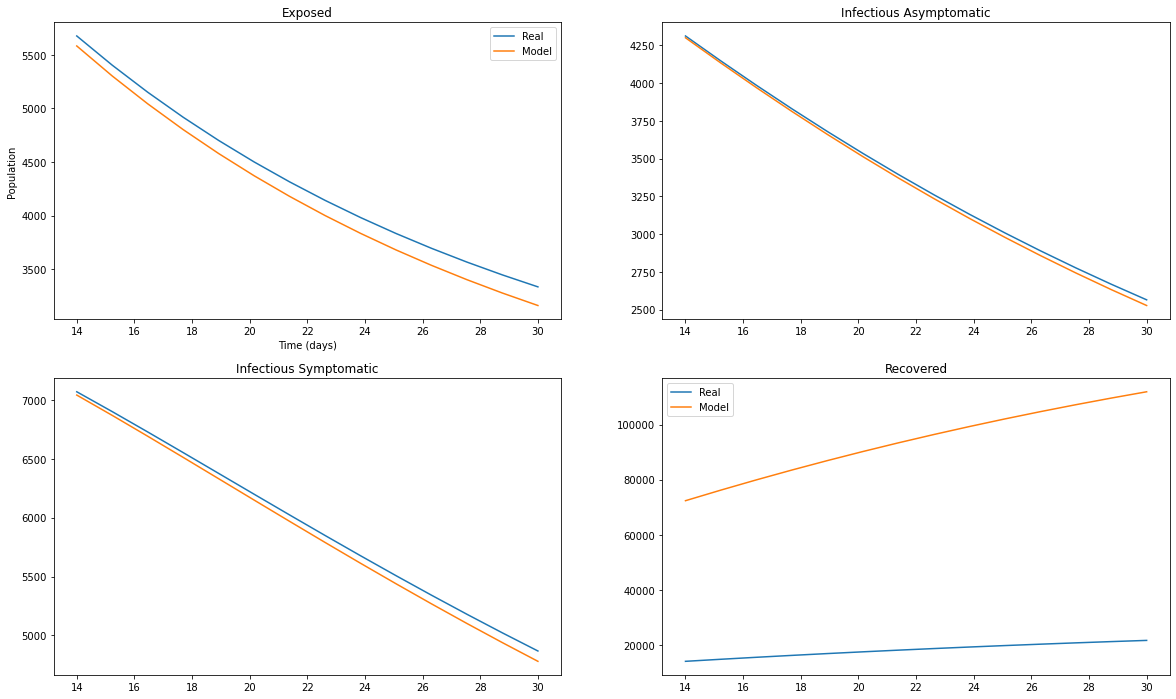

In [831]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.plot(t, EmR[15:], label = "Real")
ax1.plot(t, EmM[15:], label = "Model")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Population")
ax1.title.set_text("Exposed")
ax1.legend()
ax2.plot(t, IamR[15:], label = "Real")
ax2.plot(t, IamM[15:], label = "Model")
ax2.title.set_text("Infectious Asymptomatic")
ax3.plot(t, IsmR[15:], label = "Real")
ax3.plot(t, IsmM[15:], label = "Model")
ax3.title.set_text("Infectious Symptomatic")
ax4.plot(t, RmR[15:], label = "Real")
ax4.plot(t, RmM[15:], label = "Model")
ax4.title.set_text("Recovered")
plt.legend()
fig.savefig("../visualizations/mercer-model.png")

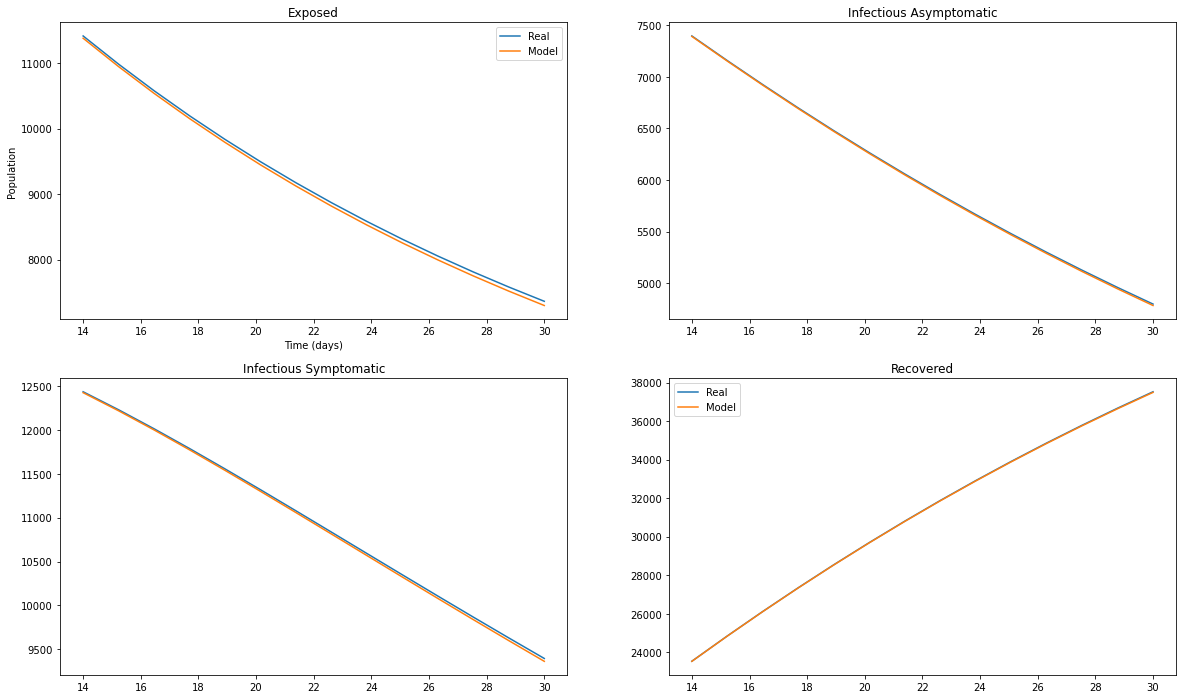

In [832]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(20)
ax1.plot(t, EsR[15:], label = "Real")
ax1.plot(t, EsM[15:], label = "Model")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Population")
ax1.title.set_text("Exposed")
ax1.legend()
ax2.plot(t, IasR[15:], label = "Real")
ax2.plot(t, IasM[15:], label = "Model")
ax2.title.set_text("Infectious Asymptomatic")
ax3.plot(t, IssR[15:], label = "Real")
ax3.plot(t, IssM[15:], label = "Model")
ax3.title.set_text("Infectious Symptomatic")
ax4.plot(t, RsR[15:], label = "Real")
ax4.plot(t, RsM[15:], label = "Model")
ax4.title.set_text("Recovered")
plt.legend()
fig.savefig("../visualizations/suffolk-model.png")

In [833]:
DeA = EaR[-1] - EaM[-1]
DiaA = IaaR[-1] - IaaM[-1]
DisA = IsaR[-1] - IsaM[-1]
DirA = RaR[-1] - RaM[-1]
DpA = PaR[-1] - PaM[-1]
DeM = EmR[-1] - EmM[-1]
DiaM = IamR[-1] - IamM[-1]
DisM = IsmR[-1] - IsmM[-1]
DirM = RmR[-1] - RmM[-1]
DpM = PmR[-1] - PmM[-1]
DeS = EsR[-1] - EsM[-1]
DiaS = IasR[-1] - IasM[-1]
DisS = IssR[-1] - IssM[-1]
DirS = RsR[-1] - RsM[-1]
DpS = PsR[-1] - PsM[-1]

In [834]:
ind = ["Alacua County (FL)", "Mercer County (OH)", "Suffolk County (VA)"]
columns = ["Susceptible", "Exposed", "Infectious Asymptomatic", "Infectious Symptomatic", "Recovered", "Pathogen"]
data = [[alachua_diff, DeA, DiaA, DisA, DirA, DpA],
       [mercer_diff, DeM, DiaM, DisM, DirM, DpM],
        [suffolk_diff, DeS, DiaS, DisS, DirS, DpS]]

In [835]:
differences = pd.DataFrame(data = data, index = ind, columns = columns)

In [836]:
differences

,Susceptible,Exposed,Infectious Asymptomatic,Infectious Symptomatic,Recovered,Pathogen
Alacua County (FL),-945.166675,-242.240010,-52.052844,-121.456637,-121.613127,-60.865650
Mercer County (OH),673.659398,173.940433,37.617727,87.774696,-90150.437281,44.124264
Suffolk County (VA),247.131497,64.245177,13.933555,32.511628,32.764669,16.355263


In [837]:
differences = differences.append(differences.sum(), ignore_index=True)
differences.index = ["Alachua County, FL", "Mercer County, OH", "Suffolk County, VA", "Totals"]

In [838]:
differences

,Susceptible,Exposed,Infectious Asymptomatic,Infectious Symptomatic,Recovered,Pathogen
"Alachua County, FL",-945.166675,-242.240010,-52.052844,-121.456637,-121.613127,-60.865650
"Mercer County, OH",673.659398,173.940433,37.617727,87.774696,-90150.437281,44.124264
"Suffolk County, VA",247.131497,64.245177,13.933555,32.511628,32.764669,16.355263
Totals,-24.375780,-4.054400,-0.501562,-1.170313,-90239.285739,-0.386122


In [839]:
model_total_vaccines

19363.33196850394